This example shows an Updated Lagrangian formulation based on 8-node quadrilateral elements. A point force in vertical direction is applied to the right tip of the beam, createing bending-type large displacements. The Saint Venant–Kirchhoff model is used with the assumption of large displacements with small strains.


Converged at the outer iteration   1 with   4 inner iterations.
Converged at the outer iteration   2 with   4 inner iterations.
Converged at the outer iteration   3 with   5 inner iterations.
Converged at the outer iteration   4 with   5 inner iterations.
Converged at the outer iteration   5 with   5 inner iterations.
Converged at the outer iteration   6 with   5 inner iterations.
Converged at the outer iteration   7 with   7 inner iterations.
Converged at the outer iteration   8 with  10 inner iterations.
Converged at the outer iteration   9 with  17 inner iterations.
Converged at the outer iteration  10 with  15 inner iterations.
Converged at the outer iteration  11 with   8 inner iterations.
Converged at the outer iteration  12 with   8 inner iterations.
Converged at the outer iteration  13 with   8 inner iterations.
Converged at the outer iteration  14 with   8 inner iterations.
Converged at the outer iteration  15 with   8 inner iterations.
Converged at the outer iteration  16 wi

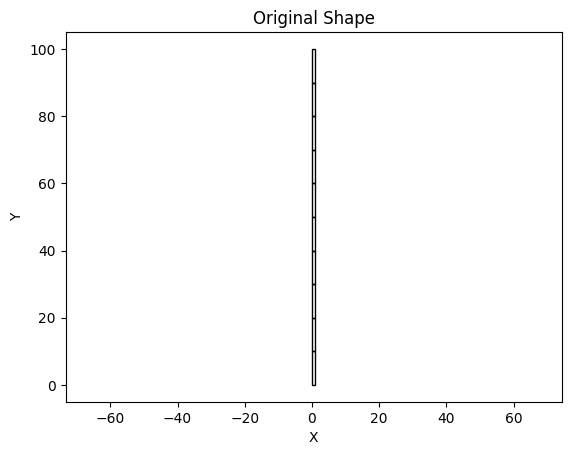

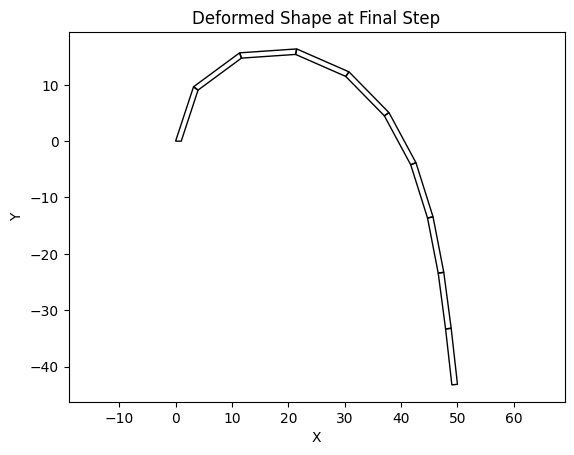

In [27]:
import FEA
import importlib
importlib.reload(FEA)
import numpy as np

# ====================== Problem Setup ======================
mesh = FEA.LoadMesh("SlenderBeamBendingExample.msh", "quad8")
material = FEA.LinearElasticMaterial2D(E=8, nu=0.3)
discretization = FEA.Element8node2D()

# ====================== Dirichlet Boundary Conditions ======================
BC_fix_xdir = np.where(mesh.nodes[:, 1] == 0)[0]
BC_fix_ydir = BC_fix_xdir + mesh.ndofs_per_dimension
DirichletBC = FEA.DirichletBC(mesh, np.unique(np.concatenate([BC_fix_xdir, BC_fix_ydir])))

# ====================== Neumann Boundary Conditions ======================
# Find the node with maximum x and maximum y (tip corner)
index_tip = np.where((mesh.nodes[:, 0] == mesh.nodes[:, 0].max()) & (mesh.nodes[:, 1] == mesh.nodes[:, 1].max()))[0][0]
NeumannBC = FEA.NeumannBC().pointLoad(0, -2e-3, index_tip, mesh)

# ======================= TL Solver Setup =======================
U_history = FEA.GeometricNonlinearUL(mesh, material, discretization, DirichletBC, NeumannBC, steps=100)

# ======================= Post-Processing =======================
plt_original = FEA.DrawMesh2D(mesh, np.zeros(mesh.total_dofs), scale=1, title="Original Shape")
plt_deformed = FEA.DrawMesh2D(mesh, U_history[:, -1], scale=1, title="Deformed Shape at Final Step")
